# Category Targeting Tech Report

## Table of Contents
1. Introduction
    - Overview of category targeting experiments
2. Experiment 1: Category Targeting (LL = 12)
    - PFR
    - P2R
    - Lag-CRP
    - Lag-Rank
    - Category Targeting Success Rate
    - First Transition Lag-CRP
    - Excluding Transitions to First Item
    - Mid-list Transition Lag-CRP
    - Discussion
3. Experiment 2: Category Targeting (LL = 6)
    - PFR
    - P2R
    - Lag-CRP
    - Lag-Rank
    - Category Targeting Success Rate
    - First Transition Lag-CRP
    - Excluding Transitions to First Item
    - Mid-list Transition Lag-CRP
    - Discussion
4. Experiment 3: Block Cat
    - PFR and P2R: Isolates
    - PFR and P2R: Block
    - Lag-CRP: Isolates and Block
    - Lag-Rank
    - Category Targeting Success Rate
    - Conditional Serial Position Curve
    - Looking More Into Isolates
    - Mixed-effects Model
    - Discussion
5. Discussion

# I. Introduction

This report aims to summarize the current findings of each category targeting experiment conducted thus far, with the main goal of assessing how category cueing events affect temporal organization. 

In all experiments below, participants are presented lists of words which are each accompanied by their respective category labels. In some trials, participants were asked to recall the word in the list they just studied when presented with its associated category label. 

Retrieved context models, like CMR, hold that the recall of an item reactivates the temporal context associated with its study event. With retrieved temporal context of a certain portion of the list, this encourages the participant to recall neighboring items. 

It is unknown, however, whether successful recall after a category targeting event, which emphasizes semantic memory search, will induce a similar reinstatement of temporal context. 

The following experiments manipulate both list length and category structure within the list to understand the role of semantic information in episodic memory experiments. 


## Summary of Experiments

### - **Experiment 1: Category Targeting (12)** : 
 - List length (LL) of 12 words
 - Each word of a unique semantic category
 - No categories repeat between trials
 - Two recall types: Control (free recall) or Category Cued (Item 4-9 could be cued, followed by free recall)

### - **Experiment 2: Category Targeting (6)** : 
 - Same as experiment 1, but with LL of 6.

### - **Experiment 3: Block Cat**: 
- LL of 15 words, each of unique categories, EXCEPT for same category 'blocks' at pos. 4-6 and 10-12.
- In some trials, participants are asked to recall an item of the category shared by both blocks, and then freely recall the remainder of the list
- In others, participants are asked to recall items that weren't in such blocks, known as 'isolates', or freely recall the entire list.



# II. Experiment 1: Category Targeting (LL = 12)

## Import Dependencies

In [11]:
import os
import sys
sys.path.insert(0, "/Users/roberttornatore/Desktop/JATOS/study_assets_root/online_experiments/category_targeting")
import helpers
from helpers import load_data
from helpers import export_to_psifr_long_table
from psifr import fr
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

## Load data and merge

In [47]:
# %% Load data
embam_data_path = "experiments/category_targeting/expt1.h5"
embam_data = load_data(embam_data_path)
events = export_to_psifr_long_table(embam_data)

# %% Merge study and recall events
data = fr.merge_free_recall(
    events,
    list_keys=['condition', 'target_success', 'listLength', 'trial_category_cue', 'category']
)

# Analysis 1: Probability of First Recall

(0.0, 12.0)

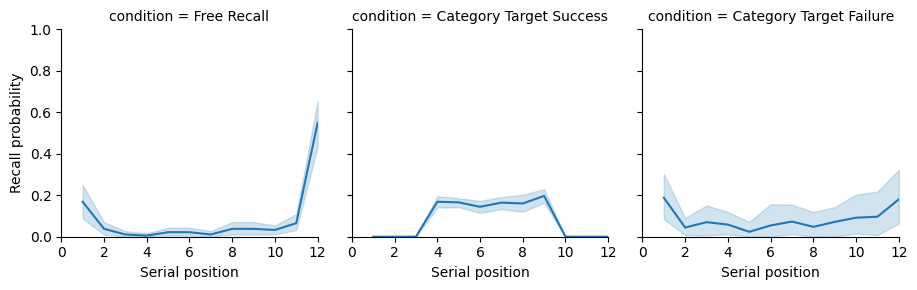

In [42]:
# %% PFR

pnr_control = fr.pnr(data.query('condition == 0'))
pnr_success = fr.pnr(data.query('condition == 2'))
pnr_attempt = fr.pnr(data.query('condition == 1'))
pnr = pd.concat([pnr_control.assign(condition='Free Recall'), pnr_success.assign(condition='Category Target Success'), pnr_attempt.assign(condition='Category Target Failure')])

pfr = pnr.query('output <= 1')
g = fr.plot_spc(pfr, col='condition', col_wrap=5)
plt.xlim(0,12)

**Analysis 1**: Probability of First Recall (PFR)

The PFR analysis plots the probability of participants' first recall based on serial position. The control condition shows a strong recency effect, with the 'success' condition confirming that participants successfully recalled cued items at positions 4 through 9. When participants fail to recall an item cued by its category label, the recenxy effect is dampened, with primacy seemingly unaffected

# Analysis 2: Probability of Second Recall

(0.0, 12.0)

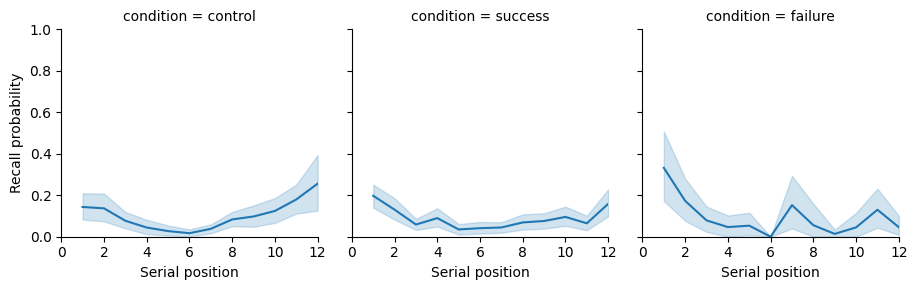

In [41]:
# %% P2R

pnr_control = fr.pnr(data.query('condition == 0'))
pnr_success = fr.pnr(data.query('condition == 2'))
pnr_attempt = fr.pnr(data.query('condition == 1'))
pnr = pd.concat([pnr_control.assign(condition='control'), pnr_success.assign(condition='success'), pnr_attempt.assign(condition='failure')])

pfr = pnr.query('output == 2')

g = fr.plot_spc(pfr, col='condition', col_wrap=5)
plt.xlim(0,12)

**Analysis 2**: Probability of Second Recall (P2R)

The P2R analysis plots the probability what each participants' second recalls are based on serial position. For this experiment, if we hypothesize temporal context reinstatement after successful category targeting, then we would expect the probability of second recall in such conditions to be higher around the cued mid-list items. However, this is not observed. The control condition maintains recency and primacy effects, which the success condition has a more flat P2R curve. Interestingly, when participants fail to remember the cued item, it appears there is a very strong primacy effect, with some increased recall of some mid-list items

# Analysis 3: Lag-CRP

(-5.0, 5.0)

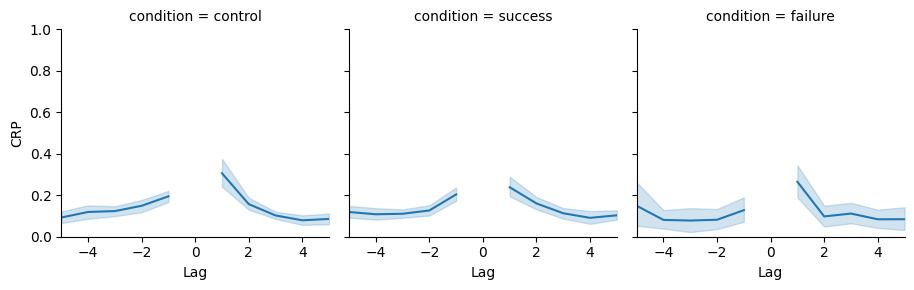

In [40]:
crp_control = fr.lag_crp(data.query('condition == 0'))
crp_success = fr.lag_crp(data.query('condition == 2'))
crp_attempt = fr.lag_crp(data.query('condition == 1'))
lag_crp = pd.concat([crp_control.assign(condition='control'), crp_success.assign(condition='success'), crp_attempt.assign(condition='failure')])


g = fr.plot_lag_crp(lag_crp, col='condition', col_wrap=5)
plt.xlim(-5,5)

**Analysis 3**: Lag-CRP. 

The Lag-CRP analysis plots the conditional response probability of making transitions (lags) after the recall of an item. To demonstrate temporal contiguity, we must observe a higher conditional response probability of making shorter transitions (lags) rather than farther transitions. Here, we observe the lag-CRP curve flatten when participants successfully recall cued items, suggesting that temporal contiguity is weakened as a result. Forward asymmetry appears to return when participants fail to remember the cued item. 

# Analysis 4: Lag-Rank 

In [30]:
ranks_control = fr.lag_rank(data.query('condition == 0'))
ranks_success = fr.lag_rank(data.query('condition == 2'))
ranks_attempt = fr.lag_rank(data.query('condition == 1'))
ranks = pd.concat([ranks_control.assign(condition='control'), ranks_success.assign(condition='success'), ranks_attempt.assign(condition='failure')])

print("Free Recall")
print(ranks_control.agg(['mean', 'sem'])['rank'])
print("Category Target Success")
print(ranks_success.agg(['mean', 'sem'])['rank'])
print("Category Target Failure")
print(ranks_attempt.agg(['mean', 'sem'])['rank'])


Free Recall
mean    0.604777
sem     0.013934
Name: rank, dtype: float64
Category Target Success
mean    0.577579
sem     0.017815
Name: rank, dtype: float64
Category Target Failure
mean    0.565450
sem     0.026559
Name: rank, dtype: float64


**Analysis 4** Lag-Rank. 

The Lag-Rank analysis looks at the transitions participants make, similarly to a lag-CRP, but boils them down to a single number. A Lag-Rank of 0.5 indicates that participants are behaving at the level of chance when making transitions, with a Lag-Rank of 1 indicating the participants always transitions to the most temporally contiguous item. Here, we observe a significant difference in the Lag-Rank score between the success condition and free recall condition, lending further to the idea that category targeting in this instance may be disrupting temporal contiguity. The Lag-Rank scores between success and failure conditions are not significantly different

# Analysis 5: Category Target Recall Rates

In [32]:
success_rates = data.query('condition > 0').pivot_table(
    index='subject', values='target_success', aggfunc='mean')

print(success_rates.agg(['mean', 'sem'])['target_success'])

mean    0.755376
sem     0.040560
Name: target_success, dtype: float64


**Analysis 5**: Category Target Recall Success. 

Participants successfully recalled cued category items around 75% of the time, indicating no issues with the category targeting mechanism during cued recall.

# Analysis 6: First Transition Lag-CRP

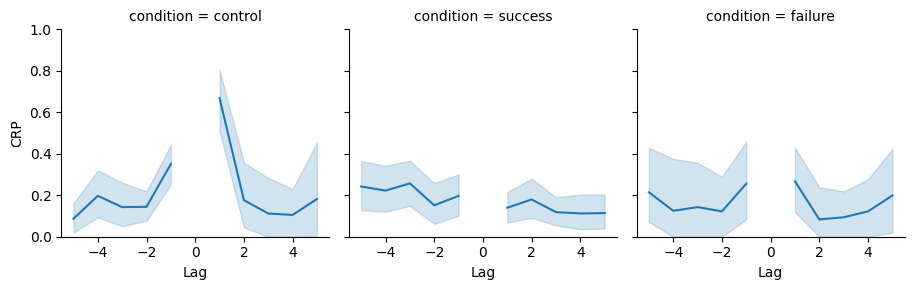

In [39]:
crp_control = fr.lag_crp(data.query('condition == 0'), item_query='output < 3 or not recall')
crp_success = fr.lag_crp(data.query('condition == 2'), item_query='output < 3 or not recall')
crp_attempt = fr.lag_crp(data.query('condition == 1'), item_query='output < 3 or not recall')
lag_crp = pd.concat([crp_control.assign(condition='control'), crp_success.assign(condition='success'), crp_attempt.assign(condition='failure')])

g = fr.plot_lag_crp(lag_crp, col='condition', col_wrap=5)

**Analysis 6**: First Transition Lag-CRP. 

This analysis is a modification of the normal Lag-CRP, instead looking only at the first transition after a recall event. This was done to see whether there may be some temporal contiguity in the immediate next recall after a cueing event. However, we still find that when there is successful recall of a category cued item, the Lag-CRP remains flat, indicating that each transition has a roughly equal probability of ocurring.  

# Analysis 7: Excluding Transitions to First Item

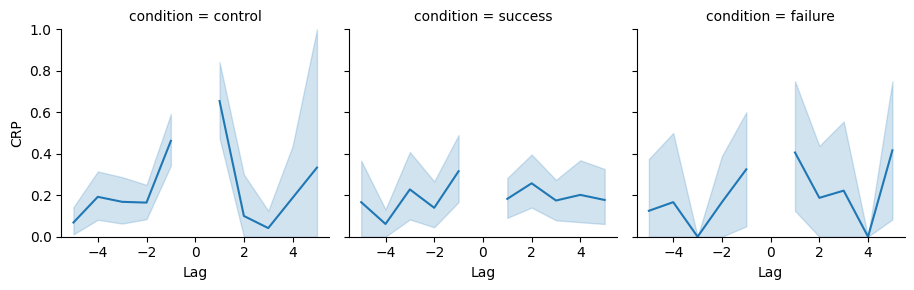

In [38]:
crp_control = fr.lag_crp(data.query('condition == 0'),  item_query='(output < 3 or not recall) and input > 2')
crp_success = fr.lag_crp(data.query('condition == 2'),  item_query='(output < 3 or not recall) and input > 2')
crp_attempt = fr.lag_crp(data.query('condition == 1'),  item_query='(output < 3 or not recall) and input > 2')
lag_crp = pd.concat([crp_control.assign(condition='control'), crp_success.assign(condition='success'), crp_attempt.assign(condition='failure')])

g = fr.plot_lag_crp(lag_crp, col='condition', col_wrap=5)

**Analysis 7**: Excluding Transitions to First Item. 

Observing weakened temporal contiguity when category cued items are successfully recalled, it was hypothesized that perhaps this can be explained by participants preferentially transitioning to the first item after recall. To see if this was the case, another Lag-CRP analysis was performed, excluding every time a participant transitioned to item one after their first response. Still, we observe a relatively flat Lag-CRP curve in the success condition, indicating disrupted temporal context reinstatement as a result of category cueing

# Analysis 8: Mid-List Transition Lag-CRP

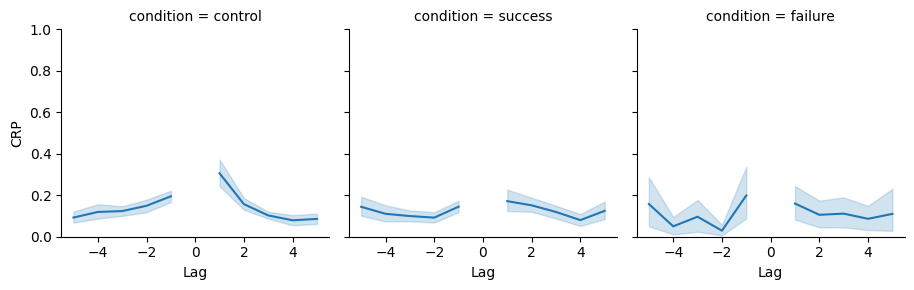

In [43]:
rp_control = fr.lag_crp(
    data.query('condition == 0'), 
    test_key='input', test=lambda x, y: 4 <= x <= 9
)
crp_success = fr.lag_crp(
    data.query('condition == 2'), 
    test_key='input', test=lambda x, y: 4 <= x <= 9
)
crp_attempt = fr.lag_crp(
    data.query('condition == 1'),
    test_key='input', test=lambda x, y: 4 <= x <= 9
)
lag_crp = pd.concat([crp_control.assign(condition='control'), crp_success.assign(condition='success'), crp_attempt.assign(condition='failure')])

g = fr.plot_lag_crp(lag_crp, col='condition', col_wrap=5)

**Analysis 8**: Mid-List Transition Lag-CRP. 

This is another modification of the Lag-CRP analysis, instead looking at transitions when recall is initiated with an item from the middle of the list (pos. 4-9). This was done to see we can still find some sort of temporal contiguity after a cueing event is successful. However, we continue to see a flattened Lag-CRP curve compared to the control condition, indicating that category targeting is disrupting temporal context reinstatement. 

# Experiment 1 Discussion

There seems to be overwhelming evidence from this experiment that category targeting events reliably disrupt reinstatement of temporal context. 

In every Lag-CRP analysis (analyses 3,6,7 & 8), the curve is flattened relative to the control condition, indicating that participants are not transitioning to temporal neighbors after successful cueing events. 

Moreover, we observe a significant differnece in the Lag-Rank scores between the control and success conditions, further lending to the idea that temporal contextual reinstatement is disrupted when prompting participants with semantic information.

We hypothesized that this effect is observed because, after successful category cueing, participants preferentially transition to primacy items. Since a bonus was given to participants for recalling cued items, as well as any item, it seems to be in their best interest to maximize overall recall by doing so. 

The next experiment aims to buffer the strength of primacy and recency effects by shortening the list length. By doing so, although primacy and recency effects will still remain, their relative strength compared to other list items will be weakened due to increased retainment of mid-list items

# III. Experiment 2: Category Targeting (LL = 6)

## Loading Data

In [48]:
# %% Load data
embam_data_path = "experiments/cat_target_short/expt_milind_pooled.h5"
embam_data = load_data(embam_data_path)
events = export_to_psifr_long_table(embam_data)

# %% Merge study and recall events
data = fr.merge_free_recall(
    events,
    list_keys=['condition', 'target_success', 'listLength', 'trial_category_cue', 'category']
)

# Analysis 1: Probability of First Recall

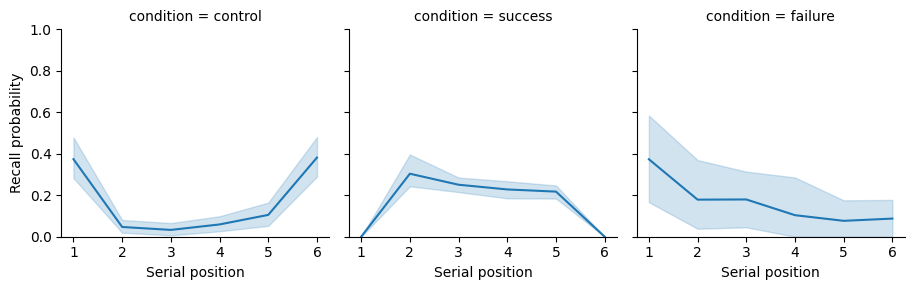

In [50]:
pnr_control = fr.pnr(data.query('condition == 0'))
pnr_success = fr.pnr(data.query('condition == 2'))
pnr_attempt = fr.pnr(data.query('condition == 1'))
pnr = pd.concat([pnr_control.assign(condition='control'), pnr_success.assign(condition='success'), pnr_attempt.assign(condition='failure')])

pfr = pnr.query('output <= 1')

g = fr.plot_spc(pfr, col='condition', col_wrap=5)

**Analysis 1**: Probability of First Recall (PFR). 

While the aim of reducing list length was to reduce the strength of primacy and recenecy effects in recall, we still observe relatively strong primacy and recency effects in the control condition. The success condition panel serves as a sanity check to confirm that positions 2-5 are cued in this experiment. Interestingly, the recency effect is reduced when participants fail to remember the cued item, showing preference for primacy. 

# Analysis 2: Probability of Second Recall

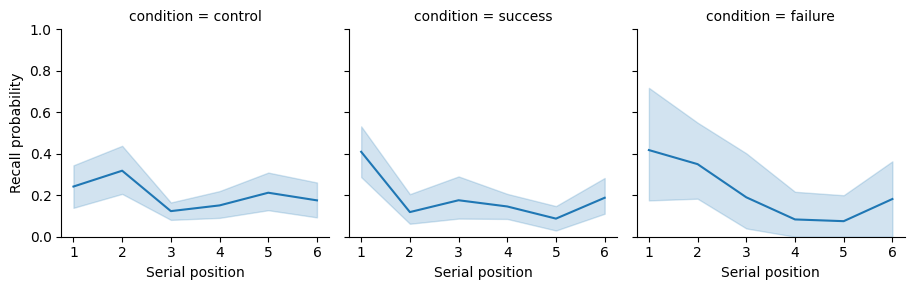

In [51]:
pnr_control = fr.pnr(data.query('condition == 0'))
pnr_success = fr.pnr(data.query('condition == 2'))
pnr_attempt = fr.pnr(data.query('condition == 1'))
pnr = pd.concat([pnr_control.assign(condition='control'), pnr_success.assign(condition='success'), pnr_attempt.assign(condition='failure')])

pfr = pnr.query('output == 2')

g = fr.plot_spc(pfr, col='condition', col_wrap=5)

**Analysis 2**: Probability of Second Recall (P2R). 

If we are expecting temporal contextual reinstatement after category cueing, then we should expect the P2R to show a higher probability of recall of mid-list items (neighbors to cued items). There seems to be a bump around item three which is not present in the PFR of the control condition, indicating a slight increase on recall probablity of these items. However, the primacy effect remains the strongest predictor of second recall. 

# Analysis 3: Lag-CRP

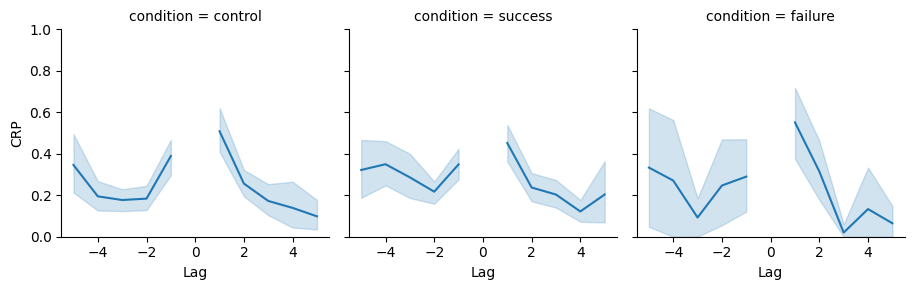

In [52]:
crp_control = fr.lag_crp(data.query('condition == 0'))
crp_success = fr.lag_crp(data.query('condition == 2'))
crp_attempt = fr.lag_crp(data.query('condition == 1'))
lag_crp = pd.concat([crp_control.assign(condition='control'), crp_success.assign(condition='success'), crp_attempt.assign(condition='failure')])

g = fr.plot_lag_crp(lag_crp, col='condition', col_wrap=5)

**Analysis 3**: Lag-CRP. 

Compared to the first experiment, the overall Lag-CRP for the successful cueing condition appears to retain some foreward asymmetry. However, it remains flattened compared to the control condition in this experiment. This continues to point in the direction that category targeting is disrupting temporal contextual reinstatement. Again, we must refer to the Lag-Rank scores to get some more qualitative evidence.

# Analysis 4: Lag-Rank 

In [53]:
ranks_control = fr.lag_rank(data.query('condition == 0'))
ranks_success = fr.lag_rank(data.query('condition == 2'))
ranks_attempt = fr.lag_rank(data.query('condition == 1'))
ranks = pd.concat([ranks_control.assign(condition='control'), ranks_success.assign(condition='success'), ranks_attempt.assign(condition='failure')])

print("control")
print(ranks_control.agg(['mean', 'sem'])['rank'])
print("success")
print(ranks_success.agg(['mean', 'sem'])['rank'])
print("failure")
print(ranks_attempt.agg(['mean', 'sem'])['rank'])

control
mean    0.649128
sem     0.030577
Name: rank, dtype: float64
success
mean    0.629084
sem     0.028654
Name: rank, dtype: float64
failure
mean    0.719213
sem     0.058255
Name: rank, dtype: float64


**Analysis 4**: Lag-Rank. 

Interestingly, we find that the Lag-Rank score between the control and success conditions to not be statistically different, whereas in experiment 1 we find that they are. Due to strong primacy effects still observed in this experiment, this may be due to the fact that, since the list is shorter, the transitions to the first item after a cueing event are therefore shorter, and not as impactful on the Lag-Rank score as before. 

# Analysis 5: Category Targeting Success Rate

In [55]:
success_rates = data.query('condition > 0').pivot_table(
    index='subject', values='target_success', aggfunc='mean')

print(success_rates.agg(['mean', 'sem'])['target_success'])

mean    0.825433
sem     0.055258
Name: target_success, dtype: float64


**Analysis 5**: Category Target Recall Success. 

Participants successfully recalled cued category items around 82% of the time, indicating no issues with the category targeting mechanism during cued recall.

# Analysis 6: First Transition Lag-CRP

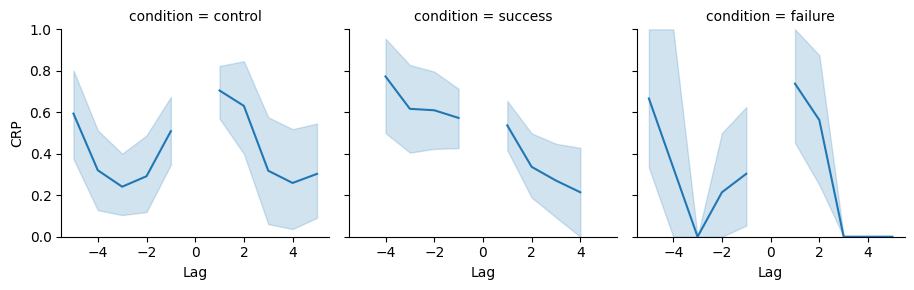

In [56]:
crp_control = fr.lag_crp(data.query('condition == 0'), item_query='output < 3 or not recall')
crp_success = fr.lag_crp(data.query('condition == 2'), item_query='output < 3 or not recall')
crp_attempt = fr.lag_crp(data.query('condition == 1'), item_query='output < 3 or not recall')
lag_crp = pd.concat([crp_control.assign(condition='control'), crp_success.assign(condition='success'), crp_attempt.assign(condition='failure')])

g = fr.plot_lag_crp(lag_crp, col='condition', col_wrap=5)

**Analysis 6**: First Transition Lag-CRP. 

Here, we continue to see that in the success condition, there is a lack of a typical Lag-CRP curve with a forward asymmetry. There is an extremely high conditional response probability of making a -4 transition, which is likely indicative of transition to the primacy item. Interestingly, there seems to be a very reduced transition to recency items. These results might be suggestive of the effects of a very short list length. We continue to see evidence that temporal context is not reliably reinstated in cases of successful category cueing. 

# Analysis 7: Excluding Transitions to First Item

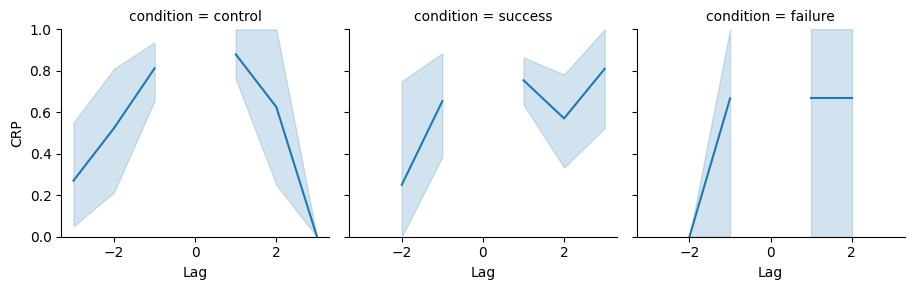

In [57]:
crp_control = fr.lag_crp(data.query('condition == 0'),  item_query='(output < 3 or not recall) and input > 2')
crp_success = fr.lag_crp(data.query('condition == 2'),  item_query='(output < 3 or not recall) and input > 2')
crp_attempt = fr.lag_crp(data.query('condition == 1'),  item_query='(output < 3 or not recall) and input > 2')
lag_crp = pd.concat([crp_control.assign(condition='control'), crp_success.assign(condition='success'), crp_attempt.assign(condition='failure')])

g = fr.plot_lag_crp(lag_crp, col='condition', col_wrap=5)


**Analysis 7**: Exlcuding Transitions to First Item. 

Here, since it seems there is an overwhelming rate of transitions to the first item of the list, we observe that transitions to temporal neighbors seem to return. Since the majority of transitions were made to item one, it seems that there may not be enough data to keep these figures from being a bit messy. However, we do see evidence of a return to making short lag transitions in the control and success conditions. 

# Analysis 8: Mid-List Transition Lag-CRP

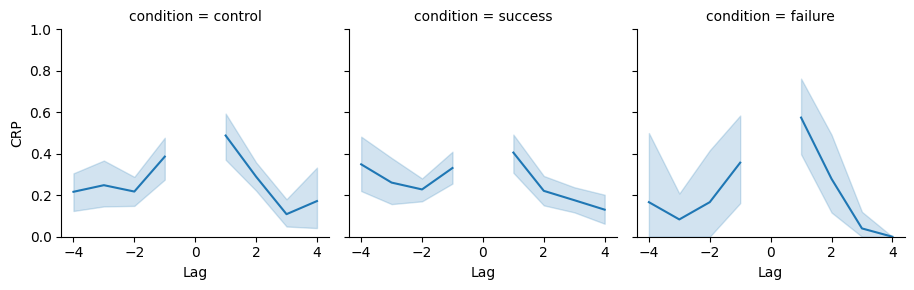

In [58]:
crp_control = fr.lag_crp(
    data.query('condition == 0'), 
    test_key='input', test=lambda x, y: 2 <= x <= 5
)
crp_success = fr.lag_crp(
    data.query('condition == 2'), 
    test_key='input', test=lambda x, y: 2 <= x <= 5
)
crp_attempt = fr.lag_crp(
    data.query('condition == 1'),
    test_key='input', test=lambda x, y: 2 <= x <= 5
)
lag_crp = pd.concat([crp_control.assign(condition='control'), crp_success.assign(condition='success'), crp_attempt.assign(condition='failure')])

g = fr.plot_lag_crp(lag_crp, col='condition', col_wrap=5)


**Analysis 8**: From-Mid-List Transition Lag-CRP. 

Here, we see a return to a much more normal looking Lag-CRP when looking at transitions specifically from mid-list items. However, the temporal contiguity does not appear particularly strong in the success condition. Mid-List transition lag ranks show that this difference is not particularly signnificant (0.64 in control vs. 0.60 in success). 

## Experiment 2 Discussion

We hypothesized that, by reducing the list length in half compared to experiment one, the strength of primacy and recency effects would be diluted by the increased probability of recall for mid-list items. 

However, in this experiment, we continue to see that category targeting does not result in a reliable reinstatement of temporal context. 

Participants preferentially transition to primacy items, and not to temporal neighbors. 

# IV. Experiment 3: Block Cat

## Determining Trial Category Labels and DF Structure

In [101]:
def get_trial_category_labels(
    category_cues: np.ndarray,
    pres_categoryids: np.ndarray,
) -> list[str]:
    """
    Determine trial category labels ("block", "isolate", "control") based on 
    how many times the cued category appears in the presented categories.

    Args:
        category_cues (np.ndarray): shape [n_trials, 1], category ID cue for each trial
        pres_categoryids (np.ndarray): shape [n_trials, n_items], category ID for each study item

    Returns:
        list[str]: one label per trial
    """
    labels = []
    for cue_cat, pres_cats in zip(category_cues[:, 0], pres_categoryids):
        matches = np.sum(pres_cats == cue_cat)
        if matches == 0:
            label = "control"
        elif matches == 1:
            print(f"Isolate: {cue_cat} {pres_cats}")
            label = "isolate"
        else:
            print(f"Block: {cue_cat} {pres_cats}")
            label = "block"
        labels.append(label)
    return labels

def get_block_success_group(
    target_success: np.ndarray,
    cue_type: list[str],
    recalls: np.ndarray,
) -> list[int]:
    """
    Returns a trial-level feature:
    - 0 if not a successful block-cue targeting trial
    - 1 if first recalled item was studied in position 4-6
    - 2 if first recalled item was studied in position 10-12
    """

    labels = []
    for success, cue, recall_positions in zip(target_success[:, 0], cue_type, recalls):
        if not (success and cue == "block"):
            labels.append(0)
            continue

        first_pos = next((pos for pos in recall_positions if pos > 0), 0)
        if first_pos in [4, 5, 6]:
            labels.append(1)
        elif first_pos in [10, 11, 12]:
            labels.append(2)
        else:
            labels.append(0)

    return labels

def get_isolate_cue_position(
    category_cues: np.ndarray,
    pres_categoryids: np.ndarray,
) -> list[float]:
    """
    Determine which input position (2, 8, 14) was cued on isolate trials.
    Returns NaN for non-isolate trials.

    Args:
        category_cues (np.ndarray): shape [n_trials, 1], cued category
        pres_categoryids (np.ndarray): shape [n_trials, n_items], presented category IDs

    Returns:
        list[float]: position of cued isolate, or NaN if not isolate
    """
    positions = []
    for cue_cat, pres_cats in zip(category_cues[:, 0], pres_categoryids):
        matches = np.where(pres_cats == cue_cat)[0]
        if len(matches) == 1:
            pos = matches[0] + 1  # convert from 0-based to 1-based
            if pos in [2, 8, 14]:
                positions.append(pos)
            else:
                positions.append(float("nan"))  # Unexpected isolate location
        else:
            positions.append(float("nan"))
    return positions


def export_to_psifr_long_table(data: dict[str, np.ndarray]) -> pd.DataFrame:
    """Convert data in EMBAM format to long table psifr format.

    Args:
        data (dict[str, np.ndarray]): Data in EMBAM format. In EMBAM format, data is stored
        in a dictionary where each key corresponds to a different variable. The values are
        2-D numpy arrays where each row corresponds to a trial. Required fields in the EMBAM
        format are: 'subject', 'listLength', 'pres_itemnos', 'recalls'. Additional fields
        such as 'condition', 'pres_itemids', and 'rec_itemids' can identify details about
        the trial or each presented or recalled item.

    Returns:
        pd.DataFrame: A pandas DataFrame whose rows correspond to a single study or recall
        event. The required fields in each row are 'subject', 'list', 'trial_type', 'position',
        and 'item'. Additional fields can be included to describe events, e.g., 'condition'.
    """
    events = {
        "subject": [],
        "list": [],
        "trial_type": [],
        "position": [],
        "item": [],
        "condition": [],
        "target_success": [],
        "listLength": [],
        "trial_category_cue": [],
        "category": [],
        "cue_type": [],
        "block_success_group": [],
        "cue_isolate_position": [],
    }

    # precompute per-trial cue labels to reuse for both study and recall events
    trial_labels = get_trial_category_labels(
        data["category_cues"],
        data["pres_categoryids"],
    )
    block_success_group = get_block_success_group(
        data["target_success"],
        trial_labels,
        data['recalls'],
    )
    isolate_cue_positions = get_isolate_cue_position(
        data["category_cues"],
        data["pres_categoryids"],
    )
   
    # first all study events
    for trial_index, trial in enumerate(data["pres_itemids"]):
        for study_index, item in enumerate(trial):
            if item == 0:
                continue
            events["subject"].append(data["subject"][trial_index][0])
            events["list"].append(data["block"][trial_index][0])
            events["trial_type"].append("study")
            events["position"].append(study_index + 1)
            events["item"].append(item)
            events["condition"].append(data["condition"][trial_index][0])
            events["target_success"].append(data["target_success"][trial_index][0])
            events["listLength"].append(data["listLength"][trial_index][0])
            events["trial_category_cue"].append(data["category_cues"][trial_index][0])
            events["category"].append(
                data["pres_categoryids"][trial_index, study_index]
            )
            events["cue_type"].append(trial_labels[trial_index])
            events["block_success_group"].append(block_success_group[trial_index])
            events["cue_isolate_position"].append(isolate_cue_positions[trial_index])

    # then all recall events
    for trial_index, trial in enumerate(data["rec_itemids"]):
        for recall_index, item in enumerate(trial):
            if item == 0:
                continue
            events["subject"].append(data["subject"][trial_index][0])
            events["list"].append(data["block"][trial_index][0])
            events["trial_type"].append("recall")
            events["position"].append(recall_index + 1)
            events["item"].append(item)
            events["condition"].append(data["condition"][trial_index][0])
            events["target_success"].append(data["target_success"][trial_index][0])
            events["listLength"].append(data["listLength"][trial_index][0])
            events["trial_category_cue"].append(data["category_cues"][trial_index][0])
            events["category"].append(
                data["rec_categoryids"][trial_index, recall_index]
            )
            events["cue_type"].append(trial_labels[trial_index])
            events["block_success_group"].append(block_success_group[trial_index])
            events["cue_isolate_position"].append(isolate_cue_positions[trial_index])

    return pd.DataFrame.from_dict(events)


In [102]:
embam_data_path = "experiments/block_cat/2025_04_10_block_cat.h5"
embam_data = load_data(embam_data_path)
events = export_to_psifr_long_table(embam_data)


Block: 26 [18 11  8 26 26 26  5 25  1 26 26 26 31 22 15]
Block: 10 [29 23 28 10 10 10  6  4 32 10 10 10 13  2 24]
Block: 7 [ 5 26 25  7  7  7 17 20 14  7  7  7 27 22  8]
Block: 25 [12 22 30 25 25 25 17 18  1 25 25 25  2  4 26]
Block: 19 [ 9 24 31 19 19 19  6 27  8 19 19 19  5 10 13]
Block: 7 [ 5 13 27  7  7  7 14 19  9  7  7  7 20  6 10]
Isolate: 25 [28 30  4 29 29 29 16 25 11 29 29 29 24  8 23]
Isolate: 19 [32 19  9 12 12 12 27  7 22 12 12 12 15  5 10]
Block: 14 [ 3  6 13 14 14 14 29 18  2 14 14 14 20 16  4]
Isolate: 20 [ 3  7 18 10 10 10  5  8 19 10 10 10 22 20  1]
Block: 25 [ 4 23 32 25 25 25 17 26 13 25 25 25 15 30 28]
Block: 1 [20 15 14  1  1  1 18  2  6  1  1  1 27 11 19]
Isolate: 14 [11 14  9  5  5  5 30 19 22  5  5  5 15  8 16]
Block: 23 [27 20  2 23 23 23 24 21  6 23 23 23 17  4 18]
Block: 16 [25 10 30 16 16 16 14 26  3 16 16 16  5 19 12]
Isolate: 8 [13 20 23 21 21 21  6  8 27 21 21 21  7 24 18]
Block: 14 [ 2 31 11 14 14 14 15 26 12 14 14 14 32 22  9]
Block: 27 [25  8 13 27 27

In [107]:
data = fr.merge_free_recall(
    events,
    list_keys=[
        "condition",
        "target_success",
        "listLength",
        "trial_category_cue",
        "category",
        "cue_type",
        "block_success_group",
        "cue_isolate_position"
    ],
)

# Analysis 1: Probability of First and Second Recall: Isolates

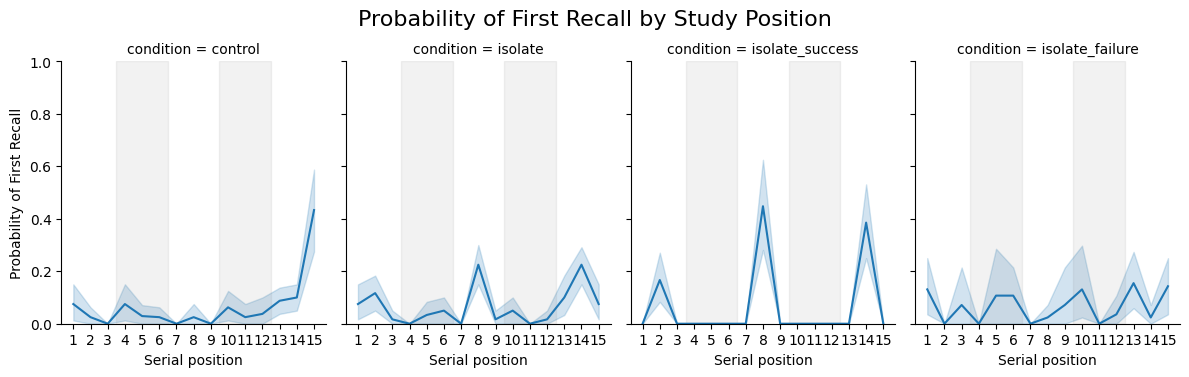

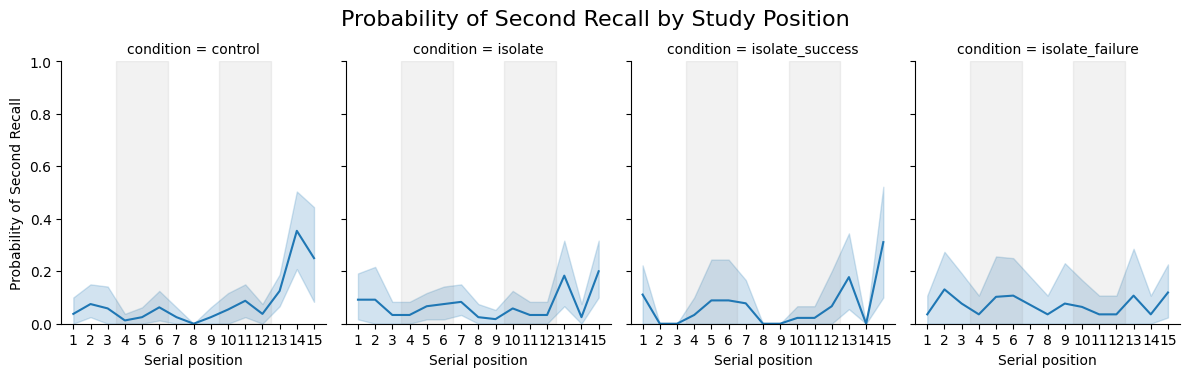

In [67]:
# %% PFR

pnr_control = fr.pnr(data.query('cue_type == "control"'))
pnr_isolate = fr.pnr(data.query('cue_type == "isolate"'))
pnr_isolate_success = fr.pnr(data.query('cue_type == "isolate" and target_success == 1'))
pnr_isolate_failure = fr.pnr(data.query('cue_type == "isolate" and target_success == 0'))

pnr = pd.concat(
    [
        pnr_control.assign(condition="control"),
        pnr_isolate.assign(condition="isolate"),
        pnr_isolate_success.assign(condition="isolate_success"),
        pnr_isolate_failure.assign(condition="isolate_failure"),
    ]
)
pfr = pnr.query("output <= 1")
g = fr.plot_spc(pfr, col="condition", col_wrap=4)
g.fig.set_size_inches(12, 4)

plt.xticks(
    np.arange(1, 16),
    [str(i) for i in range(1, 16)],
)

g.set_ylabels("Probability of First Recall")

for ax in g.axes.flat:
    ax.set_xticks(np.arange(1, 16))
    ax.set_xticklabels([str(i) for i in range(1, 16)])
    
    ax.axvspan(3.5, 6.5, color="gray", alpha=0.1)  # extend slightly beyond edges
    ax.axvspan(9.5, 12.5, color="gray", alpha=0.1)

g.fig.suptitle("Probability of First Recall by Study Position", fontsize=16)
g.fig.subplots_adjust(top=0.85)

# %% P2R

p2r = pnr.query("output == 2")
g = fr.plot_spc(p2r, col="condition", col_wrap=4)
g.fig.set_size_inches(12, 4)

plt.xticks(
    np.arange(1, 16),
    [str(i) for i in range(1, 16)],
)

g.set_ylabels("Probability of Second Recall")

for ax in g.axes.flat:
    ax.set_xticks(np.arange(1, 16))
    ax.set_xticklabels([str(i) for i in range(1, 16)])
    
    # Early block: positions 4 to 6
    ax.axvspan(3.5, 6.5, color="gray", alpha=0.1)  # extend slightly beyond edges
    
    # Late block: positions 10 to 12
    ax.axvspan(9.5, 12.5, color="gray", alpha=0.1)

g.fig.suptitle("Probability of Second Recall by Study Position", fontsize=16)
g.fig.subplots_adjust(top=0.85)

**Analysis 1**: PFR & P2R for Isolates. 

Here we see the PFR and P2R curves for the Isolate targeting condition. As seen in the isolate success panel, positions 2, 8, and 14 of the list were occassionally cued for recall, with each always being of a unique category. The P2R curve can be indicative of whether there is any immediate temporal contiguity after these cueing events. We see an increase in recall probability around positions 4-8 which is not observed in the control condition, as well as an increase in recall of item 15. 

The block positions (4-6 and 10-12) are highlighted.

# Analysis 2: Probability of First and Second Recall: Block-cued

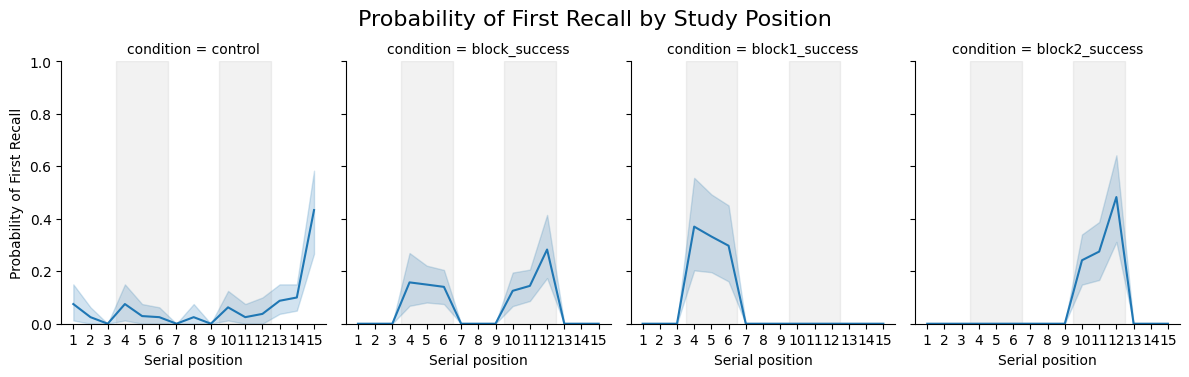

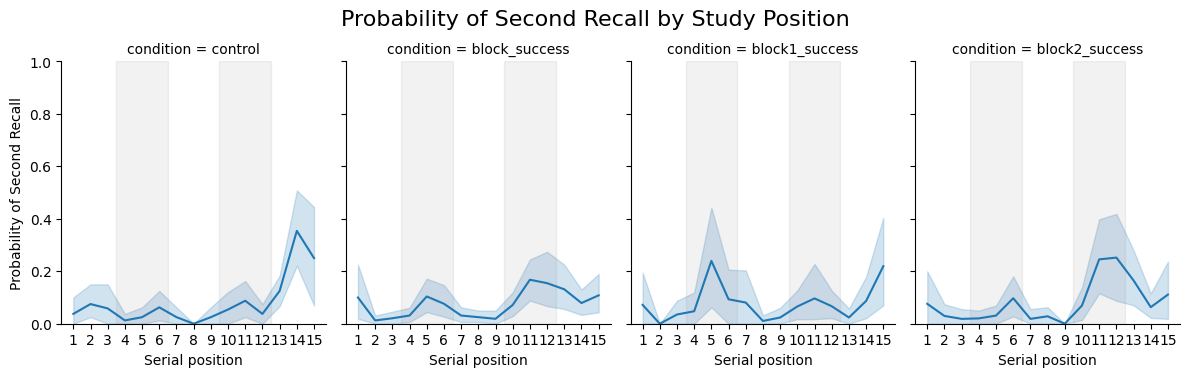

In [69]:
# %% PFR

pnr_control = fr.pnr(data.query('cue_type == "control"'))
pnr_block_success = fr.pnr(data.query('block_success_group > 0'))
pnr_block1_success = fr.pnr(data.query('block_success_group == 1'))
pnr_block2_success = fr.pnr(data.query('block_success_group == 2'))

pnr = pd.concat(
    [
        pnr_control.assign(condition="control"),
        pnr_block_success.assign(condition="block_success"),
        pnr_block1_success.assign(condition="block1_success"),
        pnr_block2_success.assign(condition="block2_success"),
    ]
)

pfr = pnr.query("output <= 1")

g = fr.plot_spc(pfr, col="condition", col_wrap=4)

g.fig.set_size_inches(12, 4)


plt.xticks(
    np.arange(1, 16),
    [str(i) for i in range(1, 16)],
)


g.set_ylabels("Probability of First Recall")

for ax in g.axes.flat:
    ax.set_xticks(np.arange(1, 16))
    ax.set_xticklabels([str(i) for i in range(1, 16)])
    
    # Early block: positions 4 to 6
    ax.axvspan(3.5, 6.5, color="gray", alpha=0.1)  # extend slightly beyond edges
    
    # Late block: positions 10 to 12
    ax.axvspan(9.5, 12.5, color="gray", alpha=0.1)

g.fig.suptitle("Probability of First Recall by Study Position", fontsize=16)

g.fig.subplots_adjust(top=0.85)

# %% P2R

p2r = pnr.query("output == 2")

g = fr.plot_spc(p2r, col="condition", col_wrap=4)

g.fig.set_size_inches(12, 4)

# show all 15 positions in xticks
plt.xticks(
    np.arange(1, 16),
    [str(i) for i in range(1, 16)],
)

g.set_ylabels("Probability of Second Recall")

# for each figure, draw vertical lines at 4, 6, 10, 12
for ax in g.axes.flat:
    ax.set_xticks(np.arange(1, 16))
    ax.set_xticklabels([str(i) for i in range(1, 16)])
    
    ax.axvspan(3.5, 6.5, color="gray", alpha=0.1)  # extend slightly beyond edges

    ax.axvspan(9.5, 12.5, color="gray", alpha=0.1)

g.fig.suptitle("Probability of Second Recall by Study Position", fontsize=16)

g.fig.subplots_adjust(top=0.85)

**Analysis 2**: PFR & P2R for Block-cued. 

Here we see the PFR and P2R curves for the block-cued trials. This is confirmed when looking at the block one and block two success panels. For each block trial, the category shared by items 4-6 and 10-12 are cued, with each individual condition dependending on which block the participant actually initiated recall in. If they reponsded with item 5, they are grouped into the block one success group, and vice versa for the other block positions. 

The P2R is indicative of there potentially being a temporal contextual reinstatement effect. If we expect temporal context is reinstated after successful category targeting, then we likewise expect there to be a higher recall probability of items in the same block as the initially recalled item.

For example, suppose a participant is cued with a block category, and then responds with item 10. The P2R is suggestive that they have a higher probability of recalling items within that second block, as opposed to same category items in the first block.

This implies that there may be some temporal contextual reinstatement guiding responses. If there was a purely semantic recall mechanism ocurring, we would expect there to be an equal chance of remembering any of the shared block category items.

However, more work must be done to confirm whether there is a significant reinstatement of temporal context independent of list position effects. 

# Analysis 3: Lag-CRP for Block and Isolate Conditions

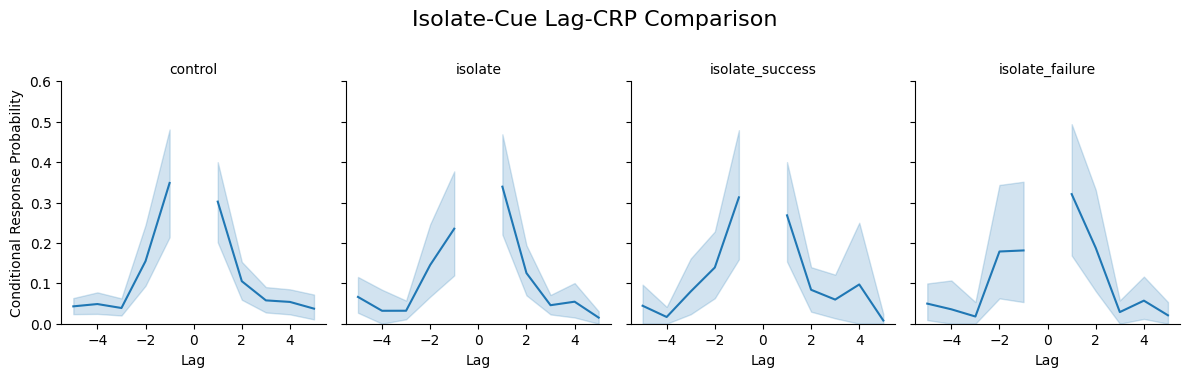

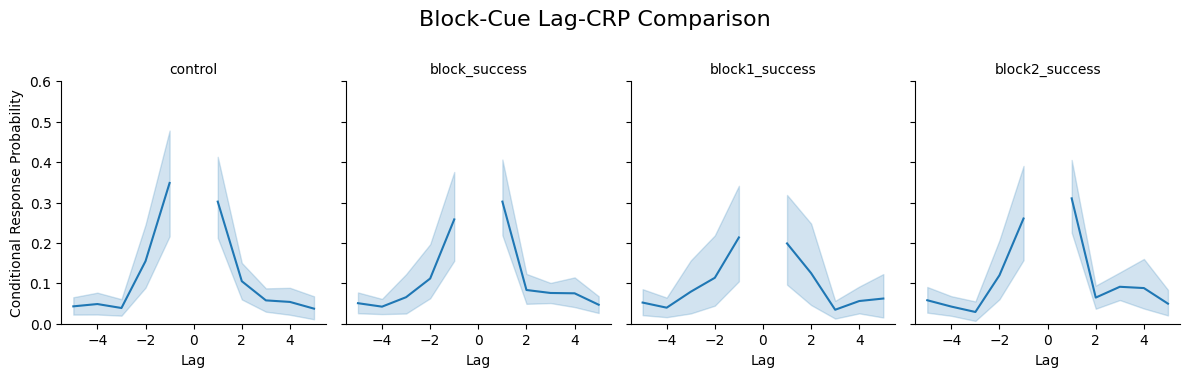

In [71]:
# %% Lag-CRP: Isolates-Focused

crp_control = fr.lag_crp(data.query('cue_type == "control"'))

crp_isolate = fr.lag_crp(data.query('cue_type == "isolate"'))
crp_isolate_success = fr.lag_crp(data.query('cue_type == "isolate" and target_success == 1'))
crp_isolate_failure = fr.lag_crp(data.query('cue_type == "isolate" and target_success == 0'))

lag_crp = pd.concat([
    crp_control.assign(condition="control"),
    crp_isolate.assign(condition="isolate"),
    crp_isolate_success.assign(condition="isolate_success"),
    crp_isolate_failure.assign(condition="isolate_failure"),
])

g = fr.plot_lag_crp(lag_crp, col="condition", col_wrap=4)
g.fig.set_size_inches(12, 4)
plt.ylim([0, 0.6])
g.set_ylabels("Conditional Response Probability")
g.set_titles("{col_name}")

# Add an overall title
g.fig.suptitle("Isolate-Cue Lag-CRP Comparison", fontsize=16)
g.fig.subplots_adjust(top=0.80)

# %% Lag-CRP: Block-Cue Focused

crp_control = fr.lag_crp(data.query('cue_type == "control"'))
crp_block_success = fr.lag_crp(data.query('block_success_group > 0'))
crp_block1_success = fr.lag_crp(data.query('block_success_group == 1'))
crp_block2_success = fr.lag_crp(data.query('block_success_group == 2'))

# Combine with condition labels
lag_crp = pd.concat([
    crp_control.assign(condition="control"),
    crp_block_success.assign(condition="block_success"),
    crp_block1_success.assign(condition="block1_success"),
    crp_block2_success.assign(condition="block2_success"),
])

g = fr.plot_lag_crp(lag_crp, col="condition", col_wrap=4)
g.fig.set_size_inches(12, 4)
plt.ylim([0, 0.6])
g.set_ylabels("Conditional Response Probability")
g.set_titles("{col_name}")

g.fig.suptitle("Block-Cue Lag-CRP Comparison", fontsize=16)
g.fig.subplots_adjust(top=0.80)

**Analysis 3**: Lag-CRP analysis for Block and Isolate Cues. 

Compared to both previous experiments thus far, we observe a more normal looking lag-CRP in both cueing conditions. This suggests that temporal contiguity may be returning after a cueing event. There seems to be a stronger effect in the isolate conditions, however, work must be done to determine whether this increase in temporal contiguity is significant. 

Interestingly, there seems to be a slight negative asymmetry in some cases, like the control condition and isolate success condition. 

# Analysis 4: Lag-Rank for Blocks

In [72]:
# %% Lag-Rank Analysis (block-focused)

ranks_control = fr.lag_rank(data.query('cue_type == "control"'))
ranks_block_success = fr.lag_rank(data.query('block_success_group > 0'))
ranks_block1_success = fr.lag_rank(data.query('block_success_group == 1'))
ranks_block2_success = fr.lag_rank(data.query('block_success_group == 2'))

ranks = pd.concat(
    [
        ranks_control.assign(condition="control"),
        ranks_block_success.assign(condition="block_success"),
        ranks_block1_success.assign(condition="block1_success"),
        ranks_block2_success.assign(condition="block2_success"),
    ]
)

print("control")
print(ranks_control.agg(["mean", "sem"])["rank"])
print("block_success")
print(ranks_block_success.agg(["mean", "sem"])["rank"])
print("block1_success")
print(ranks_block1_success.agg(["mean", "sem"])["rank"])
print("block2_success")
print(ranks_block2_success.agg(["mean", "sem"])["rank"])

control
mean    0.768319
sem     0.032824
Name: rank, dtype: float64
block_success
mean    0.703938
sem     0.035565
Name: rank, dtype: float64
block1_success
mean    0.639021
sem     0.049736
Name: rank, dtype: float64
block2_success
mean    0.693578
sem     0.039642
Name: rank, dtype: float64


/Users/roberttornatore/miniconda3/lib/python3.11/site-packages/psifr/measures.py:236: RuntimeWarning: Mean of empty slice
  {'subject': subject, 'rank': np.nanmean(ranks)}, index=[subject]


**Analysis 4**: Lag-Rank for Blocks. 

The Lag-Rank score for block-cued items seems to be significantly higher than the Lag-Rank score in previous experiments for cued items. While not as high or higher than the control condition, this is further evidence pointing toward reinstatement of temporal contexual information. 

# Analysis 5: Category Target Success Rate

In [73]:
# %% Focus on targetting trials, then aggregating target_success by subject
success_rates = data.query("condition > 0").pivot_table(
    index="subject", values="target_success", aggfunc="mean"
)

# mean and sem over subjects
print(success_rates.agg(["mean", "sem"])["target_success"])

mean    0.718402
sem     0.059045
Name: target_success, dtype: float64


**Analysis 5**: Category Target Success Rate. 

Participants successfully recalled cued category items around 71% of the time, indicating no issues with the category targeting mechanism during cued recall. 

# Analysis 6: Conditional Probability of Second Recall

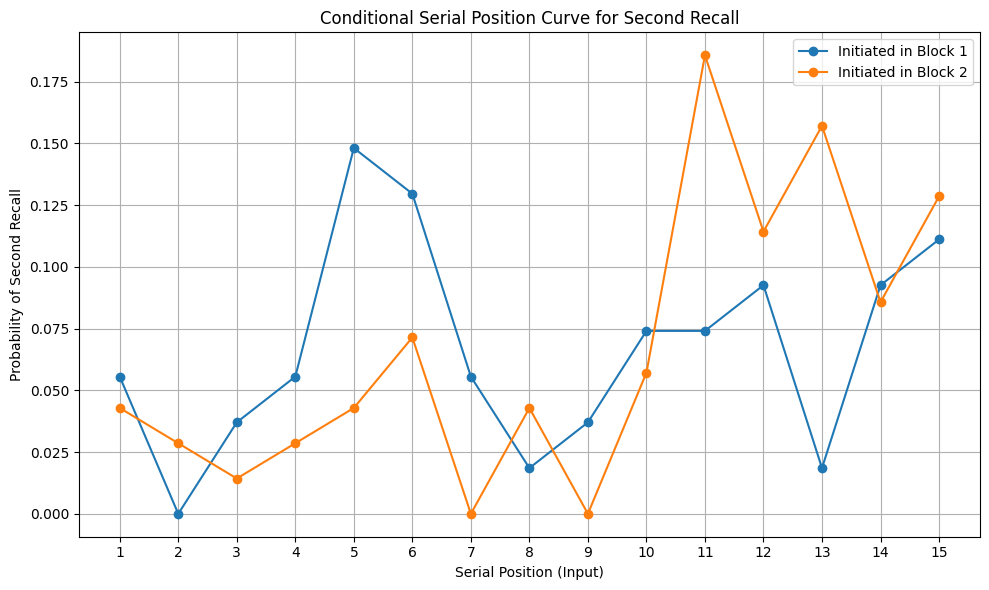

In [95]:

second_recalls = data[(data['recall']) & (data['output'] == 2)].copy()

block_info = data[['subject', 'list', 'block_success_group']].drop_duplicates()


if 'block_success_group' in second_recalls.columns:
    second_recalls = second_recalls.drop(columns=['block_success_group'])

second_recalls = second_recalls.merge(block_info, on=['subject', 'list'], how='left')

second_recalls = second_recalls.dropna(subset=['block_success_group'])

second_recalls['block_success_group'] = second_recalls['block_success_group'].astype(int)

serial_counts = second_recalls.groupby(['block_success_group', 'input']).size().unstack(fill_value=0)

serial_probs = serial_counts.div(serial_counts.sum(axis=1), axis=0)

plt.figure(figsize=(10, 6))
for group in [1, 2]:
    if group in serial_probs.index:
        plt.plot(
            serial_probs.columns,
            serial_probs.loc[group],
            marker='o',
            label=f'Initiated in Block {group}'
        )

plt.title('Conditional Serial Position Curve for Second Recall')
plt.xlabel('Serial Position (Input)')
plt.ylabel('Probability of Second Recall')
plt.xticks(range(1, 16))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

**Analysis 6**: Conditional Serial Position Curve for Second Recall. 

One of the issues with using the P2R to draw conclusions about the likelihood of making transitions to neighbors after a 'block_cue' is that it doesn't account for the fact that one block item will automatically be eliminated from the pool of possible recall words after the first recall event. Therefore, a P2R plotting the conditional serial position curve for second recall will give a better sense of how participants response to successful block cue recalls. 

As we can see, more evidence is lent to the idea that you are more likely to continue recall with items within the same block you initiate in. The blue curve, denoting an initiation in block 1 (4,5,6), has a higher observed conditional response probability compared to the block 2 items, with a similar trend observed in the orange curve, which denotes initiation in block 2 (10,11,12). 

Whether this hightened probability of recall in the same block recall was initiated in is significant must be determined from other methods. However, this is an indicator that there may be temporal contextual reinstatement ocurring. 


# Analysis 7: Looking More Into Isolates

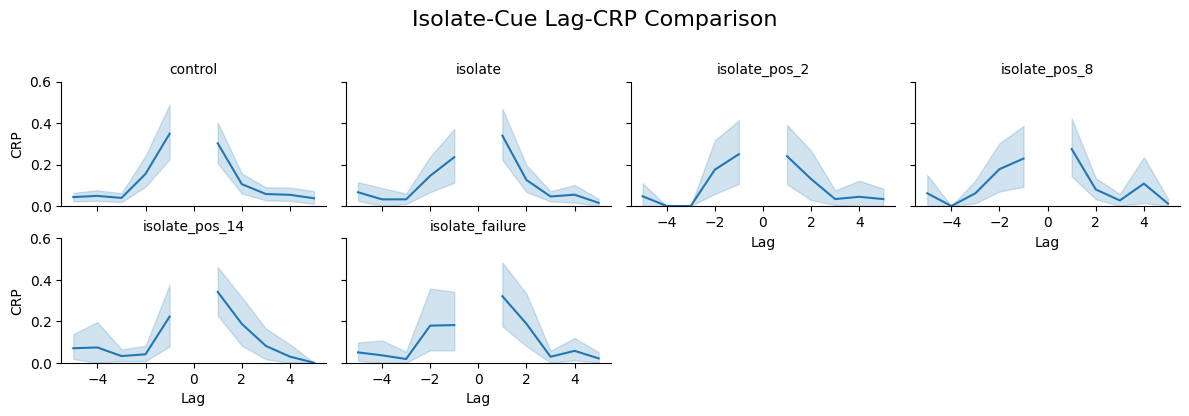

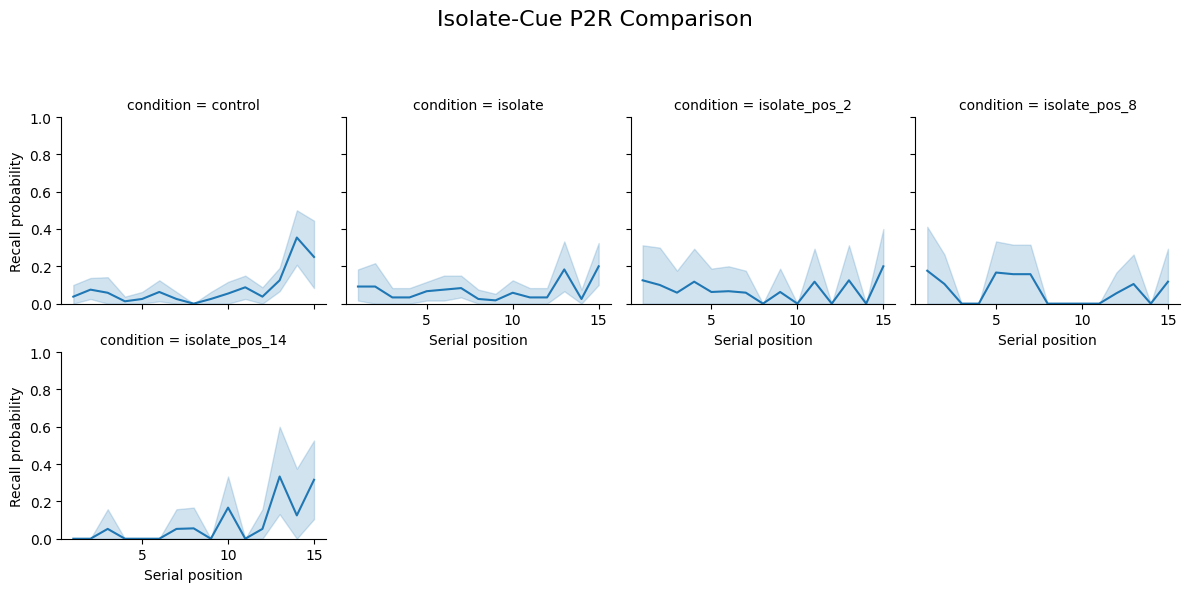

In [113]:
# %% Lag-CRP: Isolates-Focused

crp_control = fr.lag_crp(data.query('cue_type == "control"'))
crp_isolate = fr.lag_crp(data.query('cue_type == "isolate"'))
crp_isolate_2 = fr.lag_crp(data.query('cue_type == "isolate" and cue_isolate_position == 2'))
crp_isolate_8 = fr.lag_crp(data.query('cue_type == "isolate" and cue_isolate_position == 8'))
crp_isolate_14 = fr.lag_crp(data.query('cue_type == "isolate" and cue_isolate_position == 14'))
crp_isolate_failure = fr.lag_crp(data.query('cue_type == "isolate" and target_success == 0'))

lag_crp = pd.concat([
    crp_control.assign(condition="control"),
    crp_isolate.assign(condition="isolate"),
    crp_isolate_2.assign(condition="isolate_pos_2"),
    crp_isolate_8.assign(condition="isolate_pos_8"),
    crp_isolate_14.assign(condition="isolate_pos_14"),
    crp_isolate_failure.assign(condition="isolate_failure"),
])

g = fr.plot_lag_crp(lag_crp, col="condition", col_wrap=4)
g.fig.set_size_inches(12, 4)
plt.ylim([0, 0.6])
g.set_titles("{col_name}")

# Add an overall title
g.fig.suptitle("Isolate-Cue Lag-CRP Comparison", fontsize=16)
g.fig.subplots_adjust(top=0.80)

pnr_control = fr.pnr(data.query('cue_type == "control"'))
pnr_isolate_2 = fr.pnr(data.query('cue_type == "isolate" and cue_isolate_position == 2'))
pnr_isolate_8 = fr.pnr(data.query('cue_type == "isolate" and cue_isolate_position == 8'))
pnr_isolate_14 = fr.pnr(data.query('cue_type == "isolate" and cue_isolate_position == 14'))
pnr_isolate_success = fr.pnr(data.query('cue_type == "isolate" and target_success == 1'))
pnr_isolate_failure = fr.pnr(data.query('cue_type == "isolate" and target_success == 0'))

pnr = pd.concat(
    [
        pnr_control.assign(condition="control"),
        pnr_isolate.assign(condition="isolate"),
        pnr_isolate_2.assign(condition="isolate_pos_2"),
        pnr_isolate_8.assign(condition="isolate_pos_8"),
        pnr_isolate_14.assign(condition="isolate_pos_14"),
    ]
)
pfr = pnr.query("output == 2")
g = fr.plot_spc(pfr, col="condition", col_wrap=4)

g.fig.suptitle("Isolate-Cue P2R Comparison", fontsize=16)
g.fig.subplots_adjust(top=0.80)



**Analysis 7**: Looking More Into Isolates

After adding an isolate cue position column into the dataframe, we are now able to look at each specific isolate position that was cued (pos. 2, 8, and 14).

# Analysis 8: Mixed-Effects Logistic Model

Need to ask Jordan about specific code for this, but here is a results summary:

We conducted a mixed effects logistic regression; in successful block-cued trials, we treat absolute lag, category of the recalled item, and distance from the final item of the list as individual predictors of second recall. This approach partials out the shared variance between semantic and temporal contiguity in our design, making each coefficient reflect the unique contribution of each predictor, while controlling for the other. Of the fourteen remaining possible recalls after successful cued retrieval, we found that the odds of recall declined by 9% for each additional list position of separation (b=-0.094, p = .0106), and same‐category items were nearly twice as likely to be chosen (b=0.657, p = .0011), even after controlling for a strong recency bias (b=-0.122, p < .00001). These results demonstrate simultaneous temporal and semantic context reinstatement in the first transition after a cued recall in block trials. 


# V. Discussion

## I. Experiment 1: Category Targeting (LL = 12)

### a. Results

Results from Experiment 1 are largely in favor of the idea that category targeting in these circumstances result in decreased temporal contiguity in successive responses. With a dampened lag-CRP compared to control conditions in every analysis, as well as significantly lower Lag-Rank scores in these circumstances, it is safe to assume that temporal contextual reinstatement is not significnantly guiding recall sequences. 

### b. Further Work

While in concept, Experiment 1 is a good complement to the change in category structure in Experiment 3, a bug was found in which each participant received the same word lists. While this is not likely to drastically change the results, it would be beneficial to repeat Experiment 1, but with a LL = 15 to be a more direct complement to Experiment 3. By doing so, we can target the same positions targeted in Experiment 3 to get a more direct comparison between the two when it comes to recall sequences after category targeting.

## II. Experiment 2: Category Targeting (LL = 6)

### a. Results

Results from Experiment 2 are largely the same as those we saw in Experiment 1. The hypothesized effect of shortening list length was not observed, but may point to some change in temporal contiguity as a result of list length shortening (lag-CRPs of exp 2. vs exp. 1)

### b. Further Work

Not sure if any future work is necessary for Experiment 2. 

## II. Experiment 3: Block Cat

### a. Results

The most critical result from Experiment 3 is that which explains recall behavior after cueing a block item. Based on the results from this experiment (Lag-CRP, Lag-Rank, Conditional P2R, and Mixed-Effects Regression), we have solid evidence that both semantic context and temporal context reinstatement are guiding recall. However, interestingly, while we expected the isolate cues to have a lower temporal contiguity compared to block cues, these trials actually had a higher temporal contiguity. A column was added to the data frame to observe the behavior of each specific isolate cue position, which shows similar results, and emphasizing that this contiguity is not necessarily from jumping to a nearby block, but because of transitions to temporal neighbors. 

### b. Further Work

As previously mentioned, a repeat of experiment 1 with a list length of 15 words will be a nice complement to this experiment. If we cue the same positions we cued in Experiment 3, then we will have a direct comparison for how the category structure in Exp. 3 changes temporal contiguity of responses. I would expect that, in an Exp. 1 repeat, cueing isolate position 8 will not result in the same temporal contiguity observed in Exp. 3. 
